<a href="https://colab.research.google.com/github/Dennieeeee/Analyze-Web-Session-Data/blob/master/Data_Cleaning_Data_Visualization_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
<strong>Company's Backgound</strong>
<p>Showwcase is an online platform where members of the tech community connect, share their knowledge, work experiences, and projects. It's a great place for people to share, learn, and find new opportunities. Showwcase users can like, follow, comment, and share posts on the platform. The company's goal is to build a platform that encourages users to share, exchange ideas, connect, and learn from other users. Every time a user logs into their Showwcase account, a ​new session​ begins. In each session, we track how and where a user is engaged on the platform.</p>

<strong>Challenge</strong>
<p>
I will be using this dataset to identify user engagement on Showcase. I will also deep dive into the metrics and find out what are the key causing session duration to increase and decrease.
</p>

<strong>Available Data</strong>

- session_id: unique identification number for each session
- customer_id : unique identification number for each customer
- login_date : the date the user logged into Showwcase for that session
- projects_added : boolean if at least one project was added
- likes_given : boolean if at least one like was given
- comment_given : boolean if at least one comment was given
- inactive_status : boolean if the user was inactive or idle
- bugs_occurerd : boolean if a user ran into at least one bug
- session_projects_added : number of projects added
- session_likes_given : number of likes given
- session_comments_given : number of comments given
- inactive_duration : number of seconds a user was inactive or idle
- bugs_in_session : number of bugs a user ran into
- session_duration : number of seconds a user was logged for that session

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from pandas_datareader import data, wb
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data='https://raw.githubusercontent.com/Dennieeeee/data-sources/master/showwcase_sessions.csv'
data=pd.read_csv(data)

In [ ]:
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [ ]:
data.shape

(302, 14)

In [ ]:
data.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.458194,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.474839,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

In [ ]:
data.isnull().sum()

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

# Data Preparation

Encoding all discrete variables:
- 1 is True
- 0 is False

In [ ]:
#Encoding
cleanup_nums = {"projects_added":  {True: 1, False: 0},
                "likes_given":     {True: 1, False: 0},
                "comment_given":  {True: 1, False: 0},
                "inactive_status": {True: 1, False: 0},
                "bug_occured":     {True: 1, False: 0}}
data.replace(cleanup_nums, inplace=True)
data.head(3)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,0.0,1.0,1.0,1.0,0.0,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,1.0,1.0,1.0,1.0,0.0,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,1.0,1.0,1.0,1.0,0.0,1.0,5.0,5.0,1571.0,0.0,2230.0


In [ ]:
print('Entrees duplicates: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True)

Entrees duplicates: 1


In [ ]:
null_data = data[data.isnull().any(axis=1)]
null_data

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,1.0,0.0,1.0,1.0,0.0,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data=data.drop(null_data.index)

Create a new feature:
- session_duration_minute: number of minutes a user is logged into a session
- inactive_duration_minute: number of minutes a user is inactive in a session

In [ ]:
#add a new column by converting session duration from seconds to minutes
data['session_duration_minute']=round(data['session_duration']/60)
data['inactive_duration_minute'] = round(data['inactive_duration']/60)

In [ ]:
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,session_duration_minute,inactive_duration_minute
0,624205.0,80746.0,10/30/19,0.0,1.0,1.0,1.0,0.0,0.0,24.0,3.0,1146.0,0.0,1564.0,26.0,19.0
1,624241.0,24520.0,10/30/19,1.0,1.0,1.0,1.0,0.0,2.0,3.0,5.0,133.0,0.0,1766.0,29.0,2.0
2,111002.0,32047.0,10/30/19,1.0,1.0,1.0,1.0,0.0,1.0,5.0,5.0,1571.0,0.0,2230.0,37.0,26.0
3,545113.0,23404.0,10/30/19,1.0,1.0,1.0,0.0,0.0,1.0,10.0,21.0,0.0,0.0,633.0,11.0,0.0
4,750269.0,40235.0,10/30/19,1.0,1.0,0.0,1.0,0.0,3.0,16.0,0.0,1405.0,0.0,1679.0,28.0,23.0


In [ ]:
#how many customers are in the dataset
data['customer_id'].nunique()

48

# Data Visualization

## 1. Countplots
- projects_added	
- likes_given	
- comment_given
- inactive_status	bug_occured

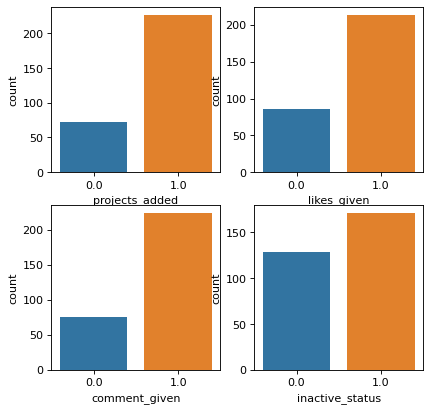

In [ ]:
plt.figure(figsize=(6,6), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
sns.countplot(data['projects_added'])
ax2 = plt.subplot(222)
sns.countplot(data['likes_given'])
ax3 = plt.subplot(223)
sns.countplot(data['comment_given'])
ax4 = plt.subplot(224)
sns.countplot(data['inactive_status'])


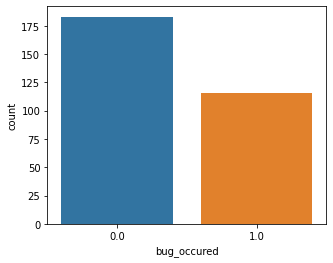

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='bug_occured',data=data)

## 2. Heatmap
It's obvious that the discrete variables strongly correlate with its continuous variable.
- comment_given and session_comments_given
- projects_added and session_projects_added

Inactive status and bugs occured form a correlation of 0.12. That means, either one caused the other.
The correlation between comment given and inactive status  -0.048. That means when comments are given, the probability of inactive status is not going to happend.

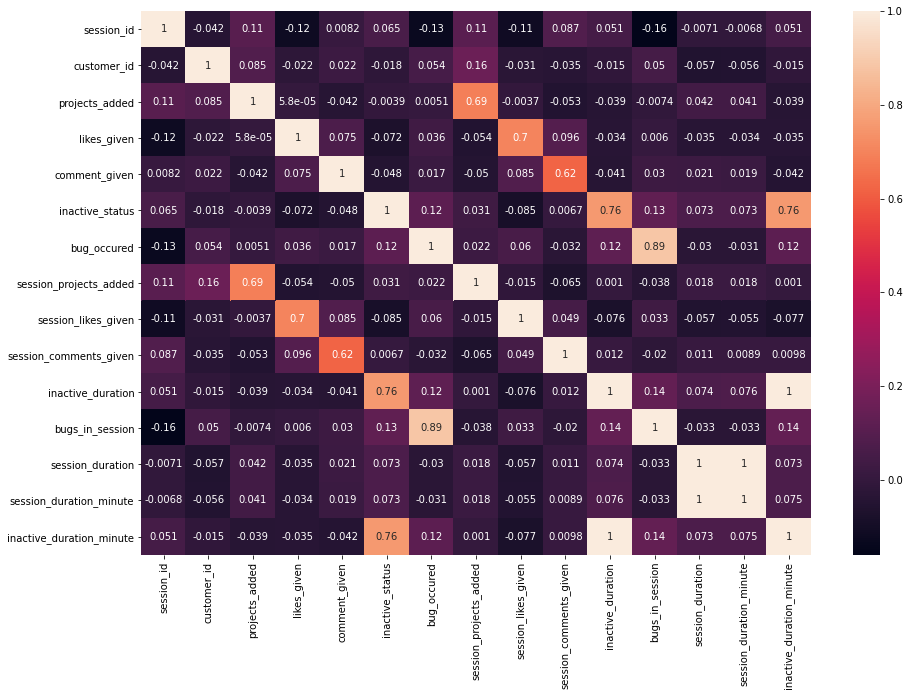

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

## 3. Boxplot:

Visualize <strong>Outliers</strong> in the following variables:
- session_projects_added
- session_likes_given
- session_comments_given
- inactive_duration
- bugs_in_session
- session_duration

Result: the data is pretty clean, a little to no outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7fce08c427f0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fce08c49240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fce08c49cc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fce08c49940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fce08c42b00>,
  <matplotlib.lines.Line2D at 0x7fce08c42e80>]}

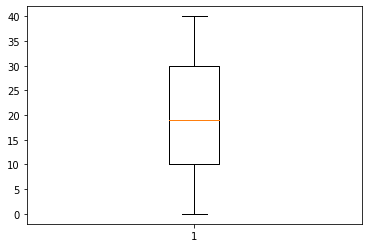

In [ ]:
plt.boxplot(data['session_duration_minute'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fce07309eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fce07316908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fce073223c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fce07322048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fce07316208>,
  <matplotlib.lines.Line2D at 0x7fce07316588>]}

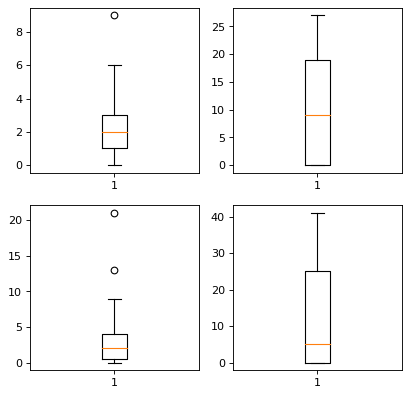

In [ ]:
plt.figure(figsize=(6,6), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
plt.boxplot(data['session_projects_added'])
ax2 = plt.subplot(222)
plt.boxplot(data['session_likes_given'])
ax3 = plt.subplot(223)
plt.boxplot(data['session_comments_given'])
ax4 = plt.subplot(224)
plt.boxplot(data['inactive_duration_minute'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fce0726b588>],
 'caps': [<matplotlib.lines.Line2D at 0x7fce0726bf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fce071faa58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fce071fa6d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fce0726b898>,
  <matplotlib.lines.Line2D at 0x7fce0726bc18>]}

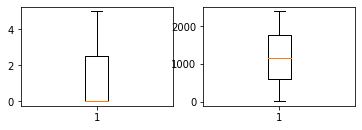

In [ ]:
ax1 = plt.subplot(221)
plt.boxplot(data['bugs_in_session'])
ax2 = plt.subplot(222)
plt.boxplot(data['session_duration'])

## 4. Histrogram

Conclusion:
- More than 20% of chances that inactive duration is 0 minute. For most of time, the inactive duration range from 1 to 40 minutes.
- The probability of giving a like and comment:
  - 5% to 6% changes that a session gets 1 to 27 likes.
  - 40% of chances that a user will not give a comment.
  - 10% to 15% of chances that a user will give 1 - 5 comments.
- About 20% to 30% of chances a user will get 1 to 5 bugs during their sessions.

Key Insights:
- As we can see, the chances of getting a like and comment is pretty low.
- People usually don't spend more than 40 minutes on the Showcase website. However, there are some exceptions.

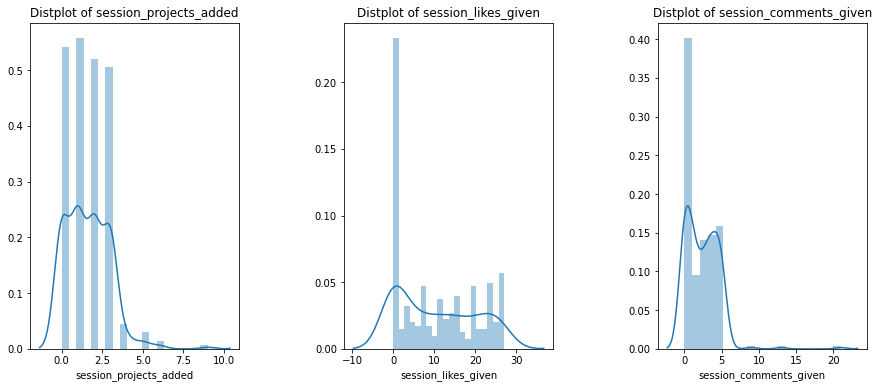

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['session_projects_added', 'session_likes_given', 'session_comments_given']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

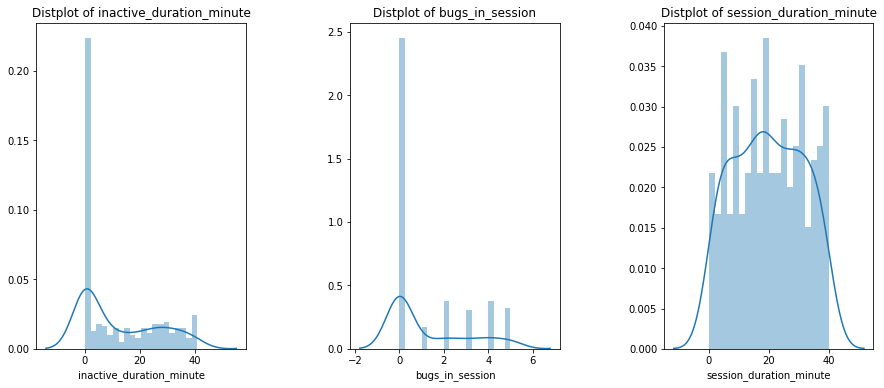

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['inactive_duration_minute', 'bugs_in_session','session_duration_minute']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

## 5. Lineplots
<strong>Session Duration</strong>

Text(0, 0.5, 'Num of users')

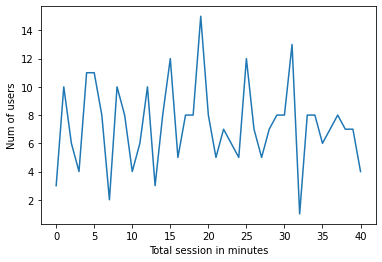

In [ ]:
# Counting the number of customers for each total sessions 
plot_df = data.groupby(by='session_duration_minute')['customer_id'].count()

# Plotting the distribution of customers that spent 0 to 100 minutes in the sessions
ax = plot_df.head(100).plot(x='session_duration_minute', y='customer_id')
ax.set_xlabel("Total session in minutes")
ax.set_ylabel("Num of users")

Overall session duration on each day

In [ ]:
data['login_date']=pd.to_datetime(data['login_date'])

In [ ]:
data2=data.set_index('login_date')
df_ts = data2[['session_duration']]


<Figure size 1296x432 with 0 Axes>

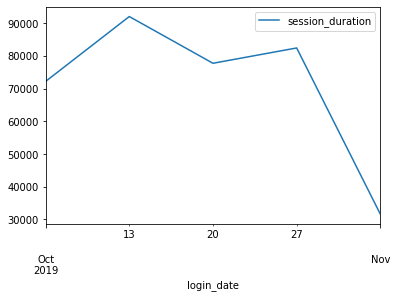

In [ ]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

### The effect of session duration highlighted
<p>Starting from the Oct 27, 2019, the session duration is drastically reduced.</p>
<p>The effect of session duration is made even more clear if we highlight this in the graph.</p>


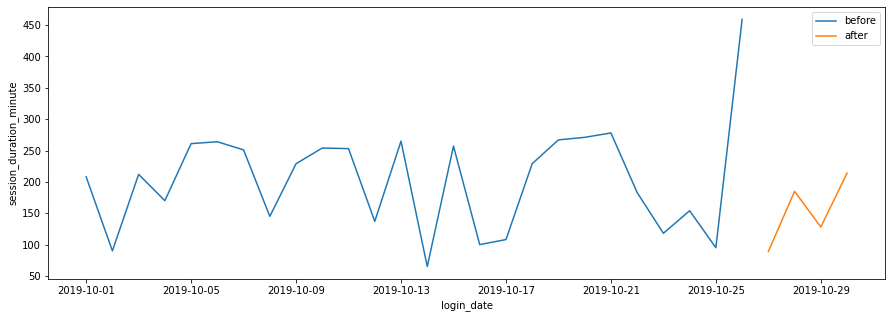

In [ ]:
plt.figure(figsize=(15,5))

decrease_point = pd.to_datetime('2019-10-27')

# Split login_date into before and after Oct 7
before = data[data['login_date']<decrease_point]
grouped_before = before.groupby(by='login_date',as_index=False)['session_duration_minute'].sum()
after = data[data['login_date']>=decrease_point]
grouped_after = after.groupby(by='login_date',as_index=False)['session_duration_minute'].sum()

# Plot session duration before and after the decrease point
ax=sns.lineplot('login_date','session_duration_minute',data=grouped_before,label='before')
sns.lineplot('login_date','session_duration_minute',data=grouped_after,label='after',ax=ax)


<strong>projects_added</strong>

If the projects are added by a user, the session duration is higher than projects aren't added. That make sense because we need to make sure all projects that we are going to publish don't have any typos or other errors.

In [ ]:
grouped_session_duration = data.groupby(by=['login_date','projects_added'],as_index=False)['session_duration'].sum()

In [ ]:
grouped_session_duration.head()

,login_date,projects_added,session_duration
0,2019-10-01,1.0,12450.0
1,2019-10-02,0.0,1809.0
2,2019-10-02,1.0,3566.0
3,2019-10-03,0.0,834.0
4,2019-10-03,1.0,11811.0


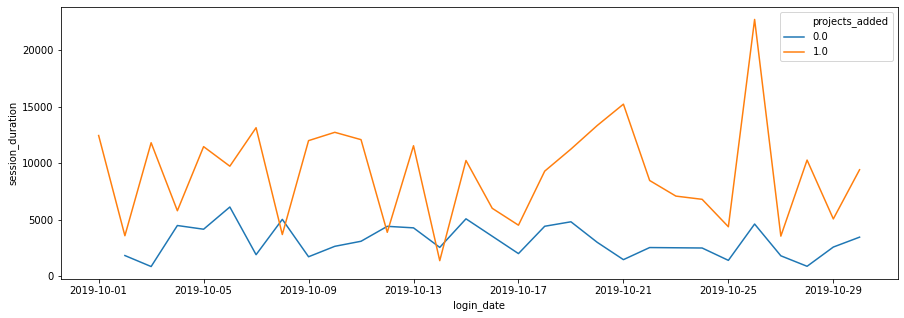

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot('login_date','session_duration',hue='projects_added',data=grouped_session_duration)

<strong>bug_occured</strong>

In [ ]:
grouped_bug_occured = data.groupby(by=['login_date','bug_occured'],as_index=False)['session_duration'].sum()

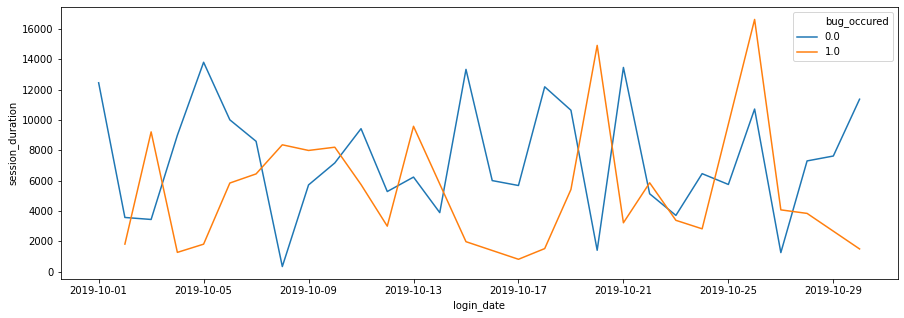

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot('login_date','session_duration',hue='bug_occured',data=grouped_bug_occured)

<strong>Likes Given</strong>

There is a very obvious point on Oct 27, 2019 when the likes given is true reached the highest point. Overall, the orange line indicates that session duration extends when users give likes.

In [ ]:
grouped_likes_given = data.groupby(by=['login_date','likes_given'],as_index=False)['session_duration'].sum()

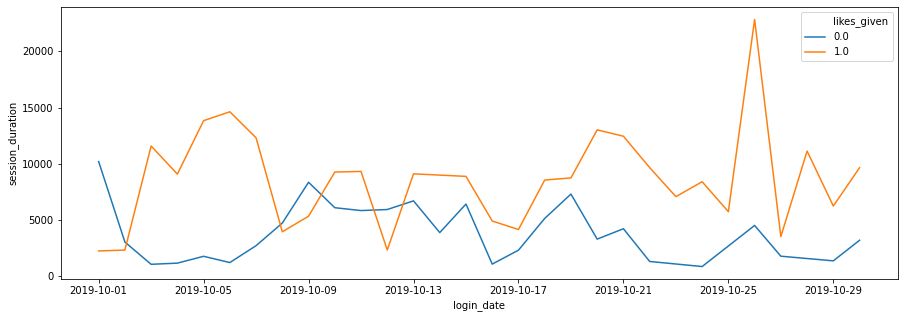

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot('login_date','session_duration',hue='likes_given',data=grouped_likes_given)

<strong>Comment Given</strong>

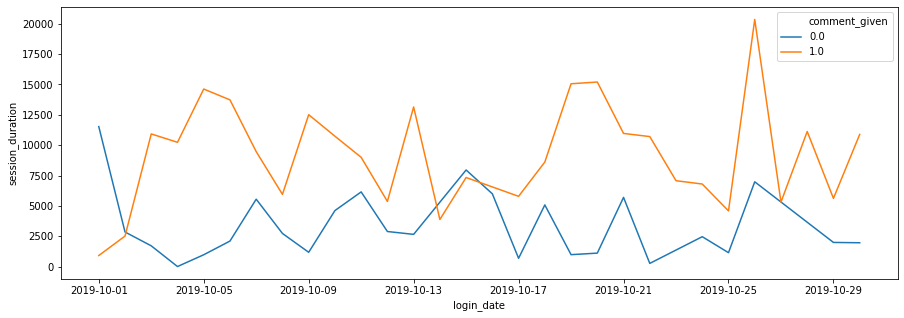

In [ ]:
grouped_comment_given = data.groupby(by=['login_date','comment_given'],as_index=False)['session_duration'].sum()
plt.figure(figsize=(15,5))
sns.lineplot('login_date','session_duration',hue='comment_given',data=grouped_comment_given)

<strong>Inactive Status</strong>

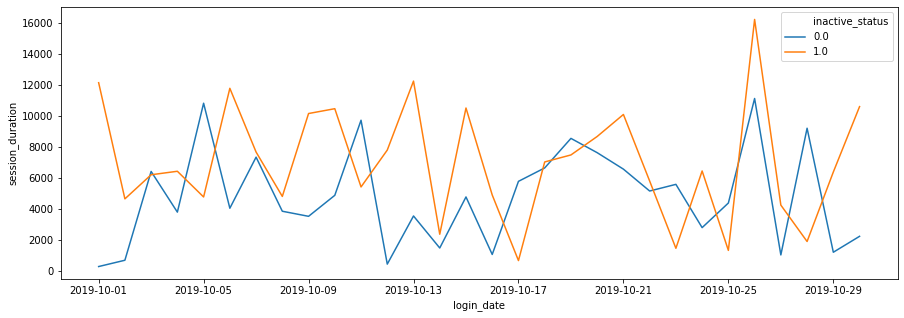

In [ ]:
grouped_inactive_status = data.groupby(by=['login_date','inactive_status'],as_index=False)['session_duration'].sum()
plt.figure(figsize=(15,5))
sns.lineplot('login_date','session_duration',hue='inactive_status',data=grouped_inactive_status)

Inactive duration each day
- 10/13 - 10/17 and 10/26 - 10/27 eached the highest inactive duration

After I break down the data into subgroups:
- 10/16 reached an inactive duration of over 22 minutes
- 10/27 reached an inactive duration of 22 minutes

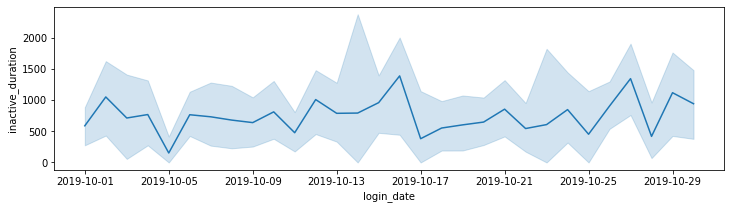

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot('login_date','inactive_duration',data=data)

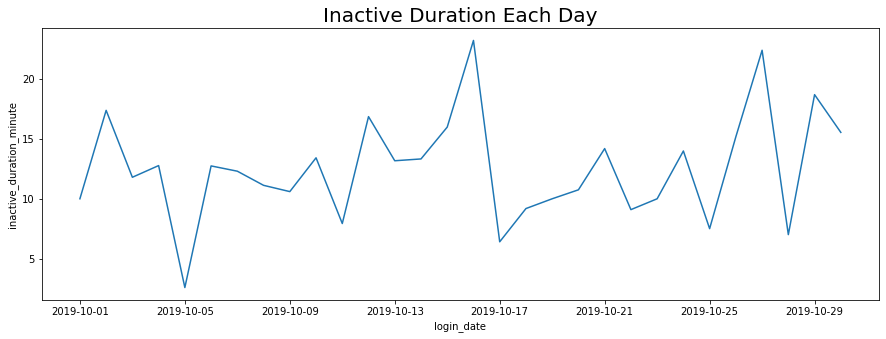

In [ ]:
#average inactive duration each day
grouped_data = data.groupby(by='login_date',as_index=False)['inactive_duration_minute'].mean()
plt.figure(figsize=(15,5))
plt.title('Inactive Duration Each Day',size=20)
sns.lineplot('login_date','inactive_duration_minute',data=grouped_data)

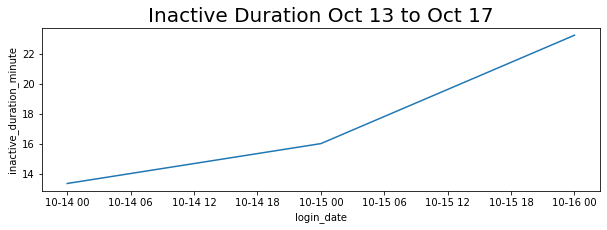

In [ ]:
plt.figure(figsize=(10,3))
plt.title('Inactive Duration Oct 13 to Oct 17',size=20)
temp = data[(data['login_date']>'2019-10-13') & 
            (data['login_date']<'2019-10-17')]
grouped_temp = temp.groupby(by='login_date',as_index=False)['inactive_duration_minute'].mean()
sns.lineplot('login_date','inactive_duration_minute',data=grouped_temp)

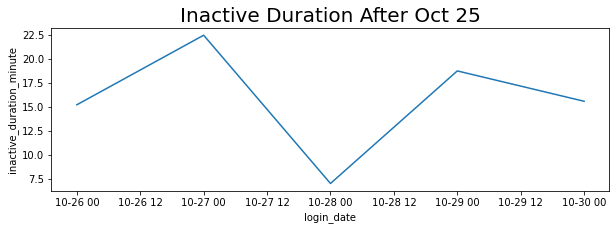

In [ ]:
temp = data[(data['login_date']>'2019-10-25')]
grouped_temp = temp.groupby(by='login_date',as_index=False)['inactive_duration_minute'].mean()
plt.figure(figsize=(10,3))
plt.title('Inactive Duration After Oct 25',size=20)
sns.lineplot('login_date','inactive_duration_minute',data=grouped_temp)

## 6. Barplots

Users who have the longest session duration
- customer id 29375 spent the longest on the site (see the table below for details)

We can spent more time to understand the detail activities of the top 10 customers with the highest session duration.

In [ ]:
#total session duration for each customer
temp_df = data.groupby('customer_id',as_index=False)['session_duration_minute'].sum().sort_values('session_duration_minute',ascending=False)

In [ ]:
temp=temp_df.head(10)
temp

,customer_id,session_duration_minute
18,29375.0,507.0
9,23404.0,411.0
22,38459.0,384.0
24,40235.0,353.0
40,87323.0,299.0
25,40572.0,298.0
34,73245.0,290.0
4,14354.0,290.0
39,87265.0,276.0
14,23985.0,217.0


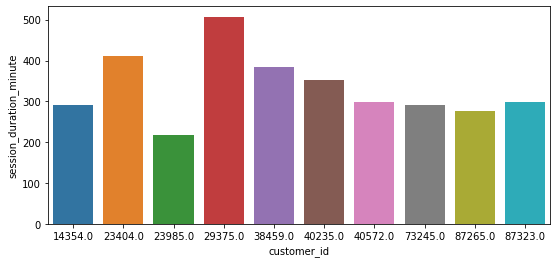

In [ ]:
plt.figure(figsize=(9,4))
sns.barplot('customer_id','session_duration_minute',data=temp)

Who gave the most likes?


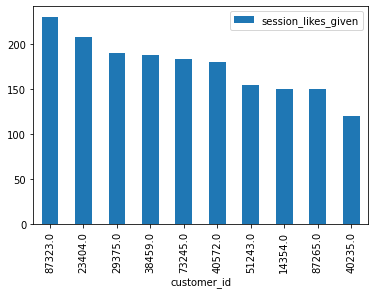

In [ ]:
grouped_data_likes = data.groupby(by=['customer_id'],as_index=False)['session_likes_given'].sum()
sorted_data=grouped_data_likes.sort_values(['session_likes_given'],ascending=False)
sorted_data.iloc[0:10].plot(x='customer_id',y='session_likes_given',kind='bar')

In [ ]:
sorted_data.iloc[0:10]

,customer_id,session_likes_given
40,87323.0,230.0
9,23404.0,207.0
18,29375.0,189.0
22,38459.0,187.0
34,73245.0,183.0
25,40572.0,179.0
32,51243.0,154.0
4,14354.0,150.0
39,87265.0,149.0
24,40235.0,119.0


### Key Insights:
- The boxplots indicate the data has a little to no outliers
- Session duration drastically decreased on October 27, 2019
- Session duration extends when projects are added
- Customer id 29375 has the longest sesion duration and 87323 gave the most number of likes.

<strong>What else can be done:</strong>
1. Explore the remaining discrete values and find out how they are related to the customers (like what has been done in the barplots section).
2. Rank the customers based on number of likes given, number of comments given, inactive duration, and bugs in session.
  - Compare the top 10 and the bottom 10 customers.
  - Analyze what is causing users to have short session duration

# Model Development
We want to build models to predict the bug occurrence: Yes or No

### Logistic Regression

In [ ]:
X=data[['session_id', 'customer_id', 'projects_added',
       'likes_given', 'comment_given', 'inactive_status', 'bug_occured',
       'session_projects_added', 'session_likes_given',
       'session_comments_given', 'inactive_duration', 'bugs_in_session',
       'session_duration', 'session_duration_minute',
       'inactive_duration_minute']]
y=data['bug_occured']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

classification report for Logistic regression
              precision    recall  f1-score   support

         0.0       0.61      0.86      0.71        43
         1.0       0.57      0.25      0.35        32

    accuracy                           0.60        75
   macro avg       0.59      0.56      0.53        75
weighted avg       0.59      0.60      0.56        75

Accuracy on Test Set for Logistic Regression : 0.60
Logistic Regression (liblinear) CrossVal Train Set Accuracy Mean: 0.62 and Standard Deviation: 0.03 



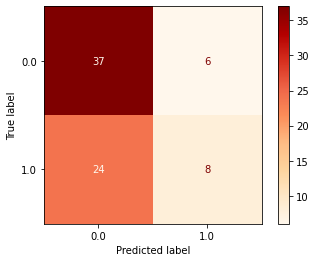

In [ ]:
# logistic
warnings.filterwarnings('ignore')

classifier1=LogisticRegression().fit(X_train,y_train)
y_pred1=classifier1.predict(X_test)
print("classification report for Logistic regression")
print(classification_report(y_test,y_pred1))
plot_confusion_matrix(classifier1,X_test,y_test,cmap='OrRd')
cm1 = confusion_matrix( y_test, y_pred1 )
print("Accuracy on Test Set for Logistic Regression : %.2f" % ((cm1[0,0] + cm1[1,1] )/len(X_test)))
scoresLR1 = cross_val_score( classifier1, X_train, y_train, cv=2)
print("Logistic Regression (liblinear) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresLR1.mean(), scoresLR1.std() ))

In [ ]:
accuracies = {}
acc = classifier1.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc

### Decision Tree

Classification report for Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Accuracy on Test Set for Decision Tree (entropy) = 1.00
Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: 1.00 and Standard Deviation: 0.00 



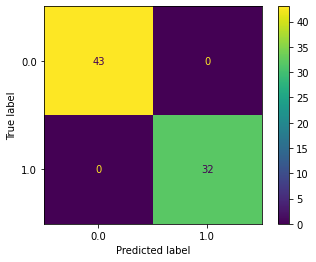

In [ ]:

# Decision Tree 
classifier3 = DecisionTreeClassifier()
classifier3.fit( X_train, y_train )
y_pred3 = classifier3.predict( X_test )

cm3 = confusion_matrix( y_test, y_pred3 )
plot_confusion_matrix(classifier3,X_test,y_test)
print("Classification report for Decision Tree")
print(classification_report(y_test,y_pred3))
print("Accuracy on Test Set for Decision Tree (entropy) = %.2f" % ((cm3[0,0] + cm3[1,1] )/len(X_test)))
scoresDT3 = cross_val_score( classifier3, X_train, y_train, cv=2)
print("Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresDT3.mean(), scoresDT3.std() ))

In [ ]:

acc = classifier3.score(X_test,y_test)*100
accuracies['Decision Tree'] = acc

### Random Forests Classifier

Classification report for Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Accuracy on Test Set for Random Forest = 1.00
Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: 1.00 and Standard Deviation: 0.00 



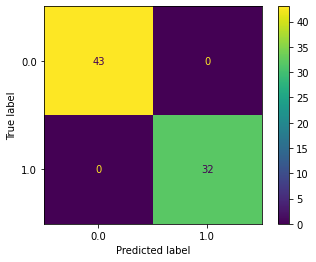

In [ ]:
# Random Forests
classifier4 = RandomForestClassifier()
classifier4.fit( X_train, y_train )
y_pred4 = classifier4.predict( X_test )

cm4 = confusion_matrix( y_test, y_pred4 )
plot_confusion_matrix(classifier4,X_test,y_test)
print("Classification report for Random Forest")
print(classification_report(y_test,y_pred3))
print("Accuracy on Test Set for Random Forest = %.2f" % ((cm4[0,0] + cm4[1,1] )/len(X_test)))
scoresRF4= cross_val_score( classifier4, X_train, y_train, cv=2)
print("Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresRF4.mean(), scoresRF4.std() ))

In [ ]:
acc = classifier4.score(X_test,y_test)*100
accuracies['Random Forest'] = acc

### SUPPORT VECTOR MACHINE

Classification report
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73        43
         1.0       0.00      0.00      0.00        32

    accuracy                           0.57        75
   macro avg       0.29      0.50      0.36        75
weighted avg       0.33      0.57      0.42        75

Accuracy on Test Set for Support Vecotr Machine = 0.57


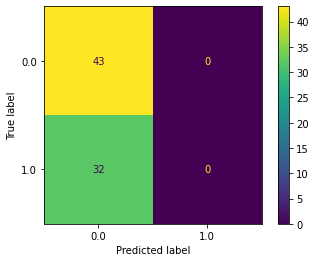

In [ ]:
#SVM
classifier5=SVC().fit(X_train,y_train)
y_pred5=classifier5.predict(X_test)
cm5 = confusion_matrix( y_test, y_pred5)

plot_confusion_matrix(classifier5,X_test,y_test)
print('Classification report')
print(classification_report(y_test,y_pred5))
print("Accuracy on Test Set for Support Vecotr Machine = %.2f" % ((cm5[0,0] + cm5[1,1] )/len(X_test)))
plt.show()

In [ ]:
acc = classifier5.score(X_test,y_test)*100
accuracies['SVM'] = acc

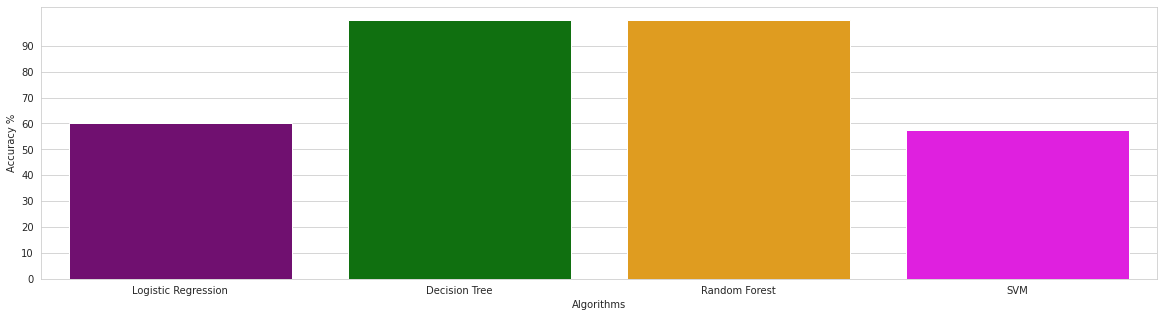

In [ ]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Hyper Parameter Tunning

Hyper parameter tuning is the process of finding the best parameters for a model and to minimize the effect of underfitting and overfitting.

<strong>Hyper parameter tuning using Random search cv for differant models</strong>


<strong>Logistic Regression</strong>

For logistic regression we have tuned the parameters and the found the best fit, suing that we build a model, predicted the values, and plotted the confusion matrix.

In [ ]:
lc=RandomizedSearchCV(LogisticRegression(random_state=30),{
    'C':[5,10,15,20],
    'max_iter':[100,150,200,250]
    
},cv=5,return_train_score=False,n_iter=2)

In [ ]:
lc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=30,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [5, 10, 15, 20],
                                        'max_iter': [100, 150, 200, 250]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
lc.best_params_

{'C': 5, 'max_iter': 200}

In [ ]:
lc.best_score_

0.6918181818181818

Classification report is given as 
              precision    recall  f1-score   support

         0.0       0.61      0.86      0.71        43
         1.0       0.57      0.25      0.35        32

    accuracy                           0.60        75
   macro avg       0.59      0.56      0.53        75
weighted avg       0.59      0.60      0.56        75

Condusion matrix is


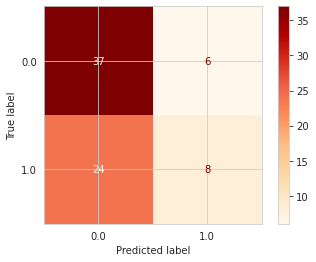

In [ ]:
lc_hy=LogisticRegression(random_state=30,C=15,max_iter=200).fit(X_train,y_train)
hy_pred1=lc_hy.predict(X_test)
print("Classification report is given as ")
print(classification_report(y_test,hy_pred1))
print("Condusion matrix is")
plot_confusion_matrix(lc_hy,X_test,y_test,cmap='OrRd')
plt.show()

In [ ]:
acc2 = lc_hy.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc2

Decision Tree Classifier

In [ ]:
dt=RandomizedSearchCV(DecisionTreeClassifier(),{
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,4,6,8,10],
    'min_samples_split':[1,2,3]
},cv=5,return_train_score=False,n_iter=2)

In [ ]:
dt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
dt.best_score_

1.0

Classification report is given as 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

confusion matrix is


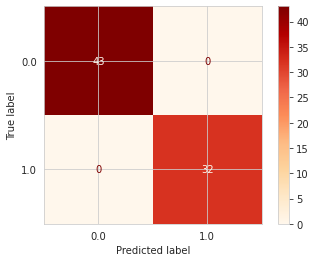

In [ ]:
dt_hy=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=6,min_samples_split=2).fit(X_train,y_train)
hy_pred2=dt_hy.predict(X_test)
print("Classification report is given as ")
print(classification_report(y_test,hy_pred2))
print('confusion matrix is')
plot_confusion_matrix(dt_hy,X_test,y_test,cmap='OrRd')
plt.show()

In [ ]:
acc2 = dt_hy.score(X_test,y_test)*100
accuracies['Decision Tree'] = acc2

Random Forest Classifier

In [ ]:
rf=RandomizedSearchCV(RandomForestClassifier(),{
    
    'n_estimators':[20,40,60],
    'max_depth':[6,8,10],
    'min_samples_split':[1,2,3]
},cv=5,return_train_score=False,n_iter=2)

In [ ]:
rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 60}

In [ ]:
rf.best_score_

1.0

Classification report is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

confusion matrix is 


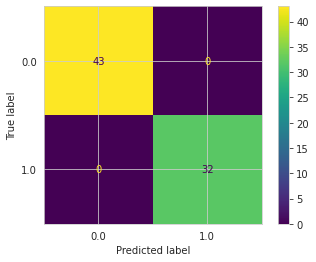

In [ ]:
rf_hy=RandomForestClassifier(n_estimators=60,max_depth=6,min_samples_split=3).fit(X_train,y_train)
hy_pred3=rf_hy.predict(X_test)
print('Classification report is ')
print(classification_report(y_test,hy_pred3))
print("confusion matrix is ")
plot_confusion_matrix(rf_hy,X_test,y_test)
plt.show()

In [ ]:

acc2 = rf_hy.score(X_test,y_test)*100
accuracies['Random Forest'] = acc2

Support Vector Machine

In [ ]:
rlf=RandomizedSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False,n_iter=2)

In [ ]:
rlf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
rlf.best_score_

0.6250505050505051

In [ ]:
rlf.best_params_

{'C': 20, 'kernel': 'rbf'}

classification report is
              precision    recall  f1-score   support

         0.0       0.62      0.79      0.69        43
         1.0       0.55      0.34      0.42        32

    accuracy                           0.60        75
   macro avg       0.58      0.57      0.56        75
weighted avg       0.59      0.60      0.58        75

confusion matrix is 


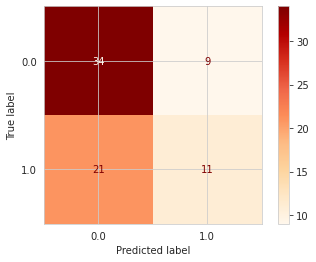

In [ ]:
svm_hy=SVC(gamma='auto',C=20,kernel='linear').fit(X_train,y_train)
hy_pred4=svm_hy.predict(X_test)
print("classification report is")
print(classification_report(y_test,hy_pred4))
print("confusion matrix is ")
plot_confusion_matrix(svm_hy,X_test,y_test,cmap='OrRd')
plt.show()

In [ ]:
acc2 = svm_hy.score(X_test,y_test)*100
accuracies['SVM'] = acc2

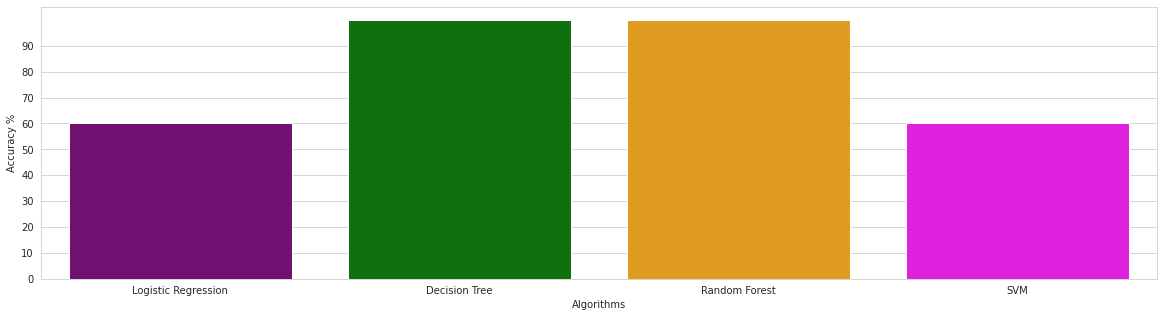

In [ ]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Before and after hyper parameter tunning, the accuracy for decision tree and random forest are overfitting.

(Best Model Performance) Logistic Regression:
- Before hyper parameter tunning: 0.60
- After hyper parameter tunning: 0.69

SVM:
- Before hyper parameter tunning: 0.57
- After hyper parameter tunning: 0.625